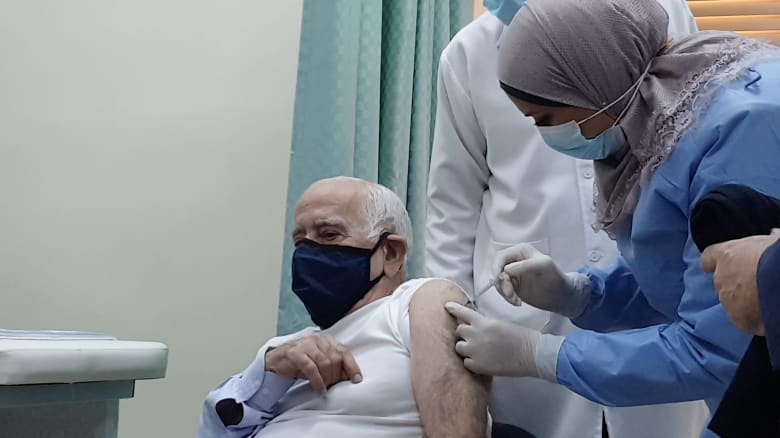
[<center>(Source)</center>](https://arabic.cnn.com/health/article/2021/01/13/first-people-receive-virus-vaccination-in-jordan)

<a id='intro'></a>
# <center> Introduction</center>
Since I heard news about the invention of  vaccines for corona virus I wanted to keep up with the progress of vaccination so as many people especially in the Arab world where I come from. Also I wanted to compare between progress in vaccination in Arab countries and the rest of the world.

<a id = 'ack'></a>
# <center>Acknowledgement</center>
Data set used in this analysis provided by [@Gabriel Preda](https://www.kaggle.com/gpreda).<br>
you can find data set here [Covid-19 world vaccination progress](https://www.kaggle.com/gpreda/covid-world-vaccination-progress).

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#ack">Acknowledgment</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#sum'>Summary</a></li>
</ul>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In order to work with data of arab countries i needed to install and use countrygroups to get the exact ciuntries of arab groups and their official name.

In [ ]:
pip install countrygroups

In [ ]:
# importing libraries  used
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth',-1)
import scipy
from countrygroups import ARAB_GROUP
pltSize = (20,10)

The following are utility functions used for analysis on world data and arab countries data.

In [ ]:
def getVaccines(df, cols):
    '''returns a data frame of each vaccine, countries that uses it and how many country that uses it.
        parameters are a data frame and columns of countries and vaccines 
    '''
    countriesPerVacc = df.loc[:,cols].copy()
    vacc = countriesPerVacc[cols[1]].str.split(', ').apply(pd.Series, 1).stack()
    vacc.index = vacc.index.droplevel(-1)
    vacc.name = cols[1]
    del countriesPerVacc[cols[1]]
    countriesPerVacc  = countriesPerVacc.join(vacc)
    countriesPerVacc = pd.DataFrame(countriesPerVacc.groupby(cols[1])[cols[0]].unique())
    countriesPerVacc['total_number_of_countries'] = countriesPerVacc[cols[0]].map(len).values
    countriesPerVacc
    return countriesPerVacc

In [ ]:
def plotBar(df, pltSize,labels,pltTitle):
    '''plots a bar plot of column
        parameters are a data frame of values of desired column to plot,
        plot size, plot labels, and plot title'''
    plt.figure(figsize = pltSize)
    plt.bar(df.index, df)
    plt.xticks(rotation = 90)
    plt.ylabel(labels[1],fontsize = 15)
    plt.xlabel(labels[0],fontsize = 15)
    plt.title(pltTitle)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 15)
    plt.show()

<a id='wrangling'></a>
# Data wrangling

In [ ]:
vaccProg = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
vaccProg.head()

In [ ]:
vaccProg.isna().sum()

In [ ]:
vaccProg.info()

some countries are missing their iso_code so let's see which countries are missing iso_code and fill them.

In [ ]:
vaccProg[vaccProg.iso_code.isna()].country.unique()

Thats the iso-codes which are used for these countries : GB-ENG for England, NC for Northern Cyprus, GB-NIR for Northern Ireland, GB-SCT for Scotland, GB-WLS for Wales.


In [ ]:
vaccProg.loc[vaccProg.country == 'England'] = vaccProg.loc[vaccProg.country == 'England'].fillna(
    {'iso_code':'GB-ENG'})
vaccProg.loc[vaccProg.country == 'Northern Cyprus'] = vaccProg.loc[vaccProg.country == 'Northern Cyprus'].fillna(
    {'iso_code':' NC '})
vaccProg.loc[vaccProg.country == 'Northern Ireland'] = vaccProg.loc[vaccProg.country == 'Northern Ireland'].fillna(
    {'iso_code':'GB-NIR'})
vaccProg.loc[vaccProg.country == 'Scotland'] = vaccProg.loc[vaccProg.country == 'Scotland'].fillna(
    {'iso_code':'GB-SCT'})
vaccProg.loc[vaccProg.country == 'Wales'] = vaccProg.loc[vaccProg.country == 'Wales'].fillna(
    {'iso_code':'GB-WLS'})

In [ ]:
vaccProg.isna().sum()

<a id='eda'></a>
# EDA

In [ ]:
plt.subplots(figsize = pltSize)
sns.heatmap(vaccProg.corr(),annot = True, square = True)
plt.show()

* # What vaccines are used and in which countries?

In [ ]:
fig = px.choropleth(locations = vaccProg.iso_code,hover_name = vaccProg.country,
                    color = vaccProg.vaccines, color_continuous_scale = 'rainbow',
                    title = 'Vaccines used in each country'
                   )
fig.show()

In [ ]:
countriesOfVacc = getVaccines(vaccProg,['country','vaccines'])
countriesOfVacc

In [ ]:
countriesOfVacc = countriesOfVacc['total_number_of_countries'].dropna().sort_values(ascending = False)

In [ ]:
plotBar(countriesOfVacc, pltSize,['Vaccine','Total number of countries'],'Number of Countries for each vaccine')

In [ ]:
totalVacc = vaccProg.loc[:,['country','total_vaccinations']].dropna().copy()
totalVacc.head()

In [ ]:
totalVacc.info()

* # What country is vaccinated more people?

In [ ]:
totalVacc = totalVacc.groupby('country')['total_vaccinations'].max().sort_values(ascending = False)

In [ ]:
plotBar(totalVacc, pltSize,['Country', 'Total vaccinations'],'Total vaccinations for each country')

In [ ]:
vaccProg.loc[vaccProg.total_vaccinations == totalVacc.max(),['country', 'date','total_vaccinations']]

In [ ]:
vaccPercent = vaccProg.loc[:,['country','people_fully_vaccinated_per_hundred']].dropna().copy()

In [ ]:
vaccPercent.head()

* # What country is vaccinated a larger percent from its population?

In [ ]:
vaccPercent = vaccPercent.groupby('country')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False)
plotBar(vaccPercent,pltSize,['Country', 'People fully vaccinated per hundred'],'Percentage of people fully Vaccinated for each country')

In [ ]:
vaccProg.loc[vaccProg.people_fully_vaccinated_per_hundred == vaccPercent.max(),['country', 'date','people_fully_vaccinated_per_hundred']]

# Now let's investigate progress of vaccination in arab countries.

First step is to see which arab countries that exists in COVID-19 World Vaccination Progress data set.

In [ ]:
vaccProg.country.unique()

In [ ]:
arabCountries = ARAB_GROUP.names
arabCountries 

In [ ]:
vaccProgArb = vaccProg.loc[vaccProg.country.isin(arabCountries) ,:].copy()
vaccProgArb.head()

> which arab countries that exists in data ?

In [ ]:
exist = vaccProgArb.country.unique()
exist

In [ ]:
notExist = [x for x in arabCountries if x not in exist ]
notExist

we can see that 8 out of 22 countries do exist in data set
so let's see which vaccines are used for each of these countries.

In [ ]:
fig = px.choropleth(locations = vaccProgArb.iso_code,hover_name = vaccProgArb.country,
                    color = vaccProgArb.vaccines, color_continuous_scale = 'rainbow',title = 'Vaccines used in each arab country')
fig.show()

* # Which vaccine is used more by arab countries?

In [ ]:
countriesOfVaccArb = getVaccines(vaccProgArb, ['country', 'vaccines'])
countriesOfVaccArb

In [ ]:
countriesOfVaccArb = countriesOfVaccArb['total_number_of_countries'].sort_values(ascending = False)
plotBar(countriesOfVaccArb, pltSize,['Vaccine', 'Total number of countries'],'Number of arab countries for each vaccine')

* # What arab country is vaccinated more people?

In [ ]:
totalVaccArb = vaccProgArb.loc[:,['country','total_vaccinations']].dropna().copy()
totalVaccArb.head()

In [ ]:
totalVaccArb = totalVaccArb.groupby('country')['total_vaccinations'].max().sort_values(ascending = False)

In [ ]:
plotBar(totalVaccArb,pltSize,['Country','Total vaccinations'], 'Total vaccinations for each arab country')

In [ ]:
vaccProgArb.loc[vaccProgArb.total_vaccinations == totalVaccArb.max(),['country', 'date','total_vaccinations']]

* # What arab country is vaccinated a larger percent from its population?

In [ ]:
vaccPercentArb = vaccProgArb.loc[:,['country','people_fully_vaccinated_per_hundred']].copy()

In [ ]:
vaccPercentArb = vaccPercentArb.groupby('country')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False)
plotBar(vaccPercentArb,pltSize,['Country', 'People fully vaccinated per hundred'],'People fully vaccinated per hundred for each arab country')

In [ ]:
vaccProgArb.loc[vaccProgArb.people_fully_vaccinated_per_hundred == vaccPercentArb.max(),['country', 'date','people_fully_vaccinated_per_hundred']]

we can see that percantage of UAE didn't change at all throughout days and that it has the largest percentage among arab countries 

<a id = 'sum'></a>
# Summary
From analysis above we can see that Pfizer/BioNTech vaccine is the most used vaccine by countries for world and also arab countries<br>
USA has vaccinated more people across the world.<br>
UAE has vaccinated more people when it comes to arab countries.<br>
Israel has the largest percentage when it comes to people vaccinated per hundred and UAE has the largest percentage when it comes to arab countries.<br> 